<a href="https://colab.research.google.com/github/gassantos/graph-optimization/blob/master/%C3%81rvore_Geradora_M%C3%ADnima_para_Colora%C3%A7%C3%A3o_de_Arestas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmo de PRIM**

> a) **O algoritmo de Prim é um algoritmo guloso. Começa com uma Árvore Geradora (AG) vazia, onde a idéia é manter dois conjuntos de vértices. O primeiro conjunto contém os vértices já incluídos na AG, o outro conjunto contém os vértices ainda não incluídos. A cada passo, ele considera todas as arestas que conectam os dois conjuntos e seleciona a aresta de peso mínimo. Depois de escolher a aresta, move-se o outro vértice da aresta para o conjunto restante**.


> b) **Um grupo de arestas que conecta dois conjuntos de vértices em um gráfico é chamado corte na teoria dos grafos. Portanto, em cada etapa do algoritmo de Prim, encontramos um corte (de dois conjuntos, um contém os vértices já incluídos - AG - e outro contém o restante das verificações), escolhe a borda de peso mínima do corte e inclui esse vértice no conjunto AG**.


> c) **Por fim, os dois subconjuntos disjuntos de vértices devem ser conectados para criar uma Árvore Geradora. E eles devem estar conectados com a borda de peso mínimo para torná-la uma Árvore Geradora Mínima**.

# **Procedimento**



1.   **Crie um conjunto de vértices já incluídos na AG**
2.   **Atribua um valor-chave a todos os vértices no gráfico de entrada.**

     a) **Inicialize todos os valores-chave (INFINITO).**
     
     b) **Atribua o valor da chave como 0 para o primeiro vértice, para que seja escolhido primeiro.**
3.   **Agora, faça:**

     a) **Escolha um vértice $u$ que não esteja na AG e tenha o valor mínimo da chave.**
     
     b) **Inclua $u$ na AG**.
     
     c) **Atualize o valor da chave de todos os vértices adjacentes de $u$.** 
     
     1. **Para atualizar os valores-chave, itere através de todos os vértices adjacentes**. 
     2. **Para cada vértice adjacente $v$, se o peso da aresta $u - v$ for menor que o valor da chave anterior de $v$, atualize o valor da chave como peso de $u - v$**



**A**.   A idéia de usar valores-chave é escolher a borda de peso mínimo do corte

**B**.   Os valores-chave são usados apenas para vértices que ainda não estão incluídos no MST

**C**.   O valor-chave desses vértices indica as arestas de peso mínimo que os conectam ao conjunto de vértices incluídos no MST

In [0]:
import sys
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
def algoritmoPrim(Grafo):
    
    vertice = [0]                # Lista dos vértices a partir do qual buscamos as arestas
    aresta_selecionada = []         # Lista com as arestas selecionadas
    peso = 0                        # Inicializando o peso da Árvore Geradora

    vertices_restantes = list(Grafo.vertices())  # Lista com os vértices-destinos da busca
    vertices_restantes.remove(raiz)              # A raiz é o ponto de partida, então sai da lista

    for i in range(len(vertices_restantes)):     # Devemos buscar |V| - 1 vértices
        custo_minimo = inf                       # Inicializamos o custo minimo como infinito
        vA, vB = None, None                      # Vértices candidatos para a aresta selecionada
        
        for v1 in vertice:                 # Para cada vertice na lista de busca origem
            for v2 in vertices_restantes:  # Buscamos os vertices que ainda nao estao no grafo final
                
                custo = Grafo.direct_cost(v1, v2)  # Calcula o custo da aresta
                if custo < custo_minimo:           # Se for menor que o mínimo ate então, atualizamos os dados
                    vA = v1
                    vB = v2
                    custo_minimo = custo

        if custo_minimo < inf:                                 # Depois de todas as buscas, se o custo é finito:
            aresta_selecionada.append((vA, vB, custo_minimo))  # Adicionamos a aresta de vA a vB na solução
            vertice.append(vB)                                 # vB agora sera nova origem de busca
            vertices_restantes.remove(vB)                      # vB nao mais sera destino de busca, pois ja consta na solução
            peso += custo_minimo                               # Atualiza o peso

    return aresta_selecionada, peso      # Retorna a lista de arestas selecionadas com o peso total

In [0]:
def criaGrafo():
    
    Grafo = nx.petersen_graph()
    pos = nx.spring_layout(Grafo)
    print("Número de Nós: ", Grafo.number_of_nodes())
    print("Número de Arestas: ", Grafo.number_of_edges())
    
    return Grafo

Número de Nós:  10
Número de Arestas:  15


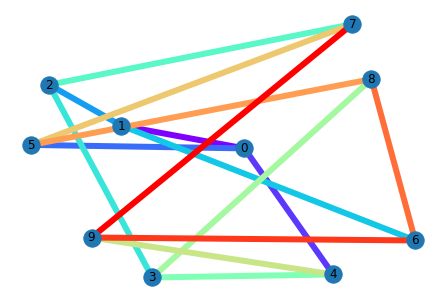

In [0]:
def colorirArestas(Grafo)
   
    edges = Grafo.number_of_edges()
    colors = range(edges)
    nx.draw(Grafo, pos, edge_color=colors, width=6, edge_cmap=plt.cm.rainbow, with_labels=True)
    plt.show()

In [0]:
G = criaGrafo()

colorirArestas(G)

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)

# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")

# read edgelist from grid.edgelist
E = nx.read_edgelist(path="grid.edgelist", delimiter=":")
print(E)

0 1 4 5
1 2 6
2 3 7
3 4 8
4 9
5 7 8
6 8 9
7 9
8
9

